## MARC 2022 Training Workshop on Machine Learning and NLP 
## Part II: NLP

### Jiangang Hao, ETS, contact: <jhao@ets.org>
----

### 1. Load packages

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import nltk
from spellchecker import SpellChecker
import string
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

### 2. Text preprocessing and Ngram 

In [3]:
text = 'The class is over. I hopep it is intersting to you. Please let me knoww if not.'

In [4]:
#change to lower case
text.lower()

'the class is over. i hopep it is intersting to you. please let me knoww if not.'

In [5]:
# word tokenization
word_tokens = word_tokenize(text)
print(word_tokens)

['The', 'class', 'is', 'over', '.', 'I', 'hopep', 'it', 'is', 'intersting', 'to', 'you', '.', 'Please', 'let', 'me', 'knoww', 'if', 'not', '.']


In [6]:
# remove stop words and punctuations
stopword_list = stopwords.words('english')
punctuation_list = list(string.punctuation)
cleaned_text = [txt for txt in word_tokenize(text.lower()) if txt not in stopword_list+punctuation_list]
print(cleaned_text)

['class', 'hopep', 'intersting', 'please', 'let', 'knoww']


In [9]:
# typo correction
spell = SpellChecker()
corrected_text = [spell.correction(wd) for wd in cleaned_text]
print(corrected_text)

['class', 'hope', 'interesting', 'please', 'let', 'knoww']


In [10]:
# part of speech tagging
pos_tag(corrected_text)

[('class', 'NN'),
 ('hope', 'NN'),
 ('interesting', 'VBG'),
 ('please', 'JJ'),
 ('let', 'VB'),
 ('knoww', 'VB')]

In [11]:
# Stemming the words
porter = PorterStemmer()
stem_words = [porter.stem(txt) for txt in corrected_text]
list(zip(corrected_text,stem_words))

[('class', 'class'),
 ('hope', 'hope'),
 ('interesting', 'interest'),
 ('please', 'pleas'),
 ('let', 'let'),
 ('knoww', 'knoww')]

In [12]:
# ngram representation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [13]:
# sentence tokenization
sentence_list = sent_tokenize(text)
print(sentence_list)

['The class is over.', 'I hopep it is intersting to you.', 'Please let me knoww if not.']


In [14]:
# applying the stop words removal and typo correction
correct_sentence_list = []
for sent in sentence_list:
    correct_sentence_list.append(' '.join([spell.correction(wd) for wd in word_tokenize(sent.lower()) \
                                  if wd not in stopword_list+punctuation_list]))
   

In [15]:
correct_sentence_list

['class', 'hope interesting', 'please let knoww']

In [16]:
#unigram
vectorizer = CountVectorizer(ngram_range=(1,1)) 
X = vectorizer.fit_transform(correct_sentence_list)
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df

class  hope  interesting  knoww  let  please
0      1     0            0      0    0       0
1      0     1            1      0    0       0
2      0     0            0      1    1       1

In [17]:
# Tf-Idf transformation of unigram
vectorizer = TfidfVectorizer(ngram_range=(1,1)) 
X = vectorizer.fit_transform(correct_sentence_list)
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df.round(2)

class  hope  interesting  knoww   let  please
0    1.0  0.00         0.00   0.00  0.00    0.00
1    0.0  0.71         0.71   0.00  0.00    0.00
2    0.0  0.00         0.00   0.58  0.58    0.58

In [18]:
#bigram
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(sentence_list)
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df

class is  hopep it  if not  intersting to  is intersting  is over  it is  \
0         1         0       0              0              0        1      0   
1         0         1       0              1              1        0      1   
2         0         0       1              0              0        0      0   

   knoww if  let me  me knoww  please let  the class  to you  
0         0       0         0           0          1       0  
1         0       0         0           0          0       1  
2         1       1         1           1          0       0

### 3. Latent Semantic Analysis
Here is a great tutorial for more details for using Gensim: <https://www.datacamp.com/tutorial/discovering-hidden-topics-python>

In [61]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# documents from communication in a collaborative task
doc_list=["So, apt. A has mail + packages delivered directly to the tenants, guaranteed same rent for 2 years, and free wifi", 
          "I like a as well","I did pick C as the best however A also has several friends that live in the same building", 
          "all utilities are included, and it includes 2 full bathrooms", "A or C is my pick, because B's rent apparently usually increases 20% after the 1st yr",
          "It also has onsite laundry which is clean and well maintained and available 24 7", "I think I'd go with A, then", "I think that the availability of  maintenance makes C the best",
          "Can we all agree that B is the worst?", "Apartment B has tenants next door with a salt water aquarium, cell phone service connectivity is weak, and there is only one full bathroom in the apartment",
          "C says maintenance isn't always handled promptly, so I'm worried about it", "B is def worst", "so yeah I dislike B", "A,C,B then?", "that weak cell phone service is enough to make me not even consider it lol",
          "Yeah utilities arent included for b", "A, C, B is definitely what I'd do, yeah", "I'd agree", "Apartment C offers a discount for local college students, the complex is located on land that used to be a farm, and the landlord owns a pizza restaurant",
          "i agree with A, C, B", "The 20% rent increase after a year for B is a big oof"]

In [55]:
len(doc_list)

21

In [27]:
# Applying preprocessing

doc_list_correct = []
for sent in doc_list:
    doc_list_correct.append(' '.join([spell.correction(wd) for wd in word_tokenize(sent.lower()) \
                                  if wd not in stopword_list+punctuation_list]))

In [31]:
# get the doc term matrix
vectorizer_lsa = TfidfVectorizer(ngram_range=(1,1)) 
X_lsa = vectorizer_lsa.fit_transform(doc_list_correct)

In [57]:
#document term matrix
pd.DataFrame(X_lsa.toarray()).head(5)

0    1    2         3    4    5    6         7        8    9   ...  \
0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.30995  0.0  ...   
1  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.00000  0.0  ...   
2  0.000000  0.0  0.0  0.325356  0.0  0.0  0.0  0.000000  0.00000  0.0  ...   
3  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.00000  0.0  ...   
4  0.307829  0.0  0.0  0.000000  0.0  0.0  0.0  0.349539  0.00000  0.0  ...   

    84   85        86       87   88   89   90   91       92        93  
0  0.0  0.0  0.000000  0.30995  0.0  0.0  0.0  0.0  0.30995  0.000000  
1  0.0  0.0  0.660912  0.00000  0.0  0.0  0.0  0.0  0.00000  0.000000  
2  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.00000  0.000000  
3  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.00000  0.000000  
4  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.00000  0.349539  

[5 rows x 94 columns]

In [58]:
# specify the number of topics and create SVD object
num_components=10
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

In [76]:
# fit SVD model on data
lsa.fit_transform(X_lsa)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_T = lsa.components_.T


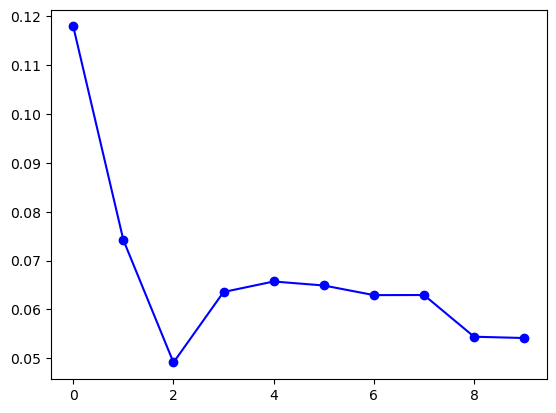

In [80]:
# explained variance by topics
plt.plot(lsa.explained_variance_ratio_,'bo-')

In [81]:
# Print the topics with their terms
terms = vectorizer_lsa.get_feature_names_out()

In [83]:
# Print the topics

def print_topics(lsa_model):
    for index, component in enumerate(lsa_model.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
        top_terms_list=list(dict(top_terms_key).keys())
        print("Topic "+str(index)+": ",top_terms_list)
print_topics(lsa)

Topic 0:  ['agree', 'worst', 'def', '20', 'am']
Topic 1:  ['yeah', 'included', 'utilities', 'definitely', 'dislike']
Topic 2:  ['think', 'best', 'go', 'maintenance', 'availability']
Topic 3:  ['apartment', 'cell', 'phone', 'service', 'weak']
Topic 4:  ['rent', '20', 'big', 'increase', 'oof']
Topic 5:  ['well', 'like', 'also', 'available', 'clean']
Topic 6:  ['worst', 'def', 'well', 'like', 'also']
Topic 7:  ['included', 'utilities', 'bathrooms', 'includes', 'full']
Topic 8:  ['pick', 'building', 'friends', 'however', 'live']
Topic 9:  ['handled', 'not', 'promptly', 'says', 'worried']


### 4. Neural Embedding

In [84]:
# word vectors (word2vec)
import gensim.downloader as api
from scipy.spatial.distance import cosine

In [85]:
#loading the 100 dimension word vector dictionary trained on twitter data. https://nlp.stanford.edu/projects/glove/
model = api.load("glove-twitter-100")

In [94]:
# get the vector of the word cat
model.get_vector('cat')

array([ 0.38446  , -0.45507  ,  0.45351  ,  0.4301   , -0.050908 ,
       -0.26414  ,  0.43253  , -0.3166   ,  0.32214  ,  0.0064333,
       -0.47066  ,  0.95335  , -3.2063   ,  0.010913 , -0.27565  ,
        1.1732   ,  0.52033  , -0.045973 ,  0.094254 , -0.53846  ,
        0.0035668,  0.11934  , -0.17815  , -0.58093  ,  0.65081  ,
       -0.48746  , -0.50961  ,  0.42771  , -0.30638  ,  0.32385  ,
        0.33687  , -0.1717   , -0.39104  , -0.19038  ,  0.37016  ,
       -0.50396  ,  0.041969 , -0.20517  ,  0.3223   ,  0.41217  ,
       -0.42191  , -0.26359  , -0.1773   , -0.35658  ,  0.52145  ,
        0.57282  ,  0.60204  ,  0.74369  ,  0.33377  , -0.45041  ,
        0.015978 , -0.12575  ,  0.29786  , -0.77635  ,  0.23759  ,
        0.63821  ,  0.63726  ,  1.0079   ,  0.13714  , -0.031928 ,
       -0.21299  ,  0.52348  ,  0.67934  , -0.1427   , -0.64236  ,
       -0.47996  , -0.87915  ,  0.17501  ,  0.64517  ,  0.3778   ,
        0.53493  , -0.29723  , -0.25206  , -0.757    ,  0.3364

In [95]:
# get the most similar words as cat
model.most_similar('cat')

[('dog', 0.8752089738845825),
 ('kitty', 0.8015091419219971),
 ('pet', 0.7986468076705933),
 ('cats', 0.797942578792572),
 ('kitten', 0.7936832904815674),
 ('puppy', 0.7702749967575073),
 ('monkey', 0.7584263682365417),
 ('bear', 0.7507942318916321),
 ('dogs', 0.7460062503814697),
 ('pig', 0.7117346525192261)]

In [96]:
# cosine similarity between cat and tiger
1-cosine(model.get_vector('cat'), model.get_vector('tiger'))

0.6474888920783997

In [97]:
#cosine similarity between cat and kitten
1-cosine(model.get_vector('cat'), model.get_vector('kitten'))

0.7936834692955017

In [98]:
#cosine similarit between cat and car
1-cosine(model.get_vector('cat'), model.get_vector('car'))

0.5291033983230591

### 5. Deep Learning Language Models
<https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads>

In [99]:
# fill the blank task
from transformers import pipeline
unmasker = pipeline('fill-mask', model='xlm-roberta-base')

/Users/jhao/mambaforge/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [100]:
pd.DataFrame(unmasker("Hello I'm Jiangang, and I am running a <mask> to teach people machine learning."))


score  token token_str  \
0  0.213851  15411    course   
1  0.130649  18507     class   
2  0.127468   1528   program   
3  0.093742  13452   project   
4  0.068059  10696    school   

                                            sequence  
0  Hello I'm Jiangang, and I am running a course ...  
1  Hello I'm Jiangang, and I am running a class t...  
2  Hello I'm Jiangang, and I am running a program...  
3  Hello I'm Jiangang, and I am running a project...  
4  Hello I'm Jiangang, and I am running a school ...

In [101]:
# another one, A: ordinary, B: stubborn, C: skeptical, D. fascinating, E. unobtrusive
pd.DataFrame(unmasker("It is ironic and somehow tragic that good people are often dull while evil people can be endlessly <mask>"))


score  token token_str  \
0  0.479797      5         .   
1  0.098909     27       ...   
2  0.032577   4127      good   
3  0.020705  17723     happy   
4  0.016820  17110       sad   

                                            sequence  
0  It is ironic and somehow tragic that good peop...  
1  It is ironic and somehow tragic that good peop...  
2  It is ironic and somehow tragic that good peop...  
3  It is ironic and somehow tragic that good peop...  
4  It is ironic and somehow tragic that good peop...

In [102]:
#sentence generation
from transformers import pipeline, set_seed
#generator = pipeline('text-generation', model='gpt2')
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')
set_seed(43)

In [103]:
prompt='Today, I am giving a traing workshop on machine learning and NLP. I am going to'
print(generator(prompt, max_length=120, num_return_sequences=1)[0].get('generated_text'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Today, I am giving a traing workshop on machine learning and NLP. I am going to demonstrate various techniques on NLP, including named entity recognition, stemming, and phrase structure parsing.

You can use this to apply all kinds of NLP tasks on text datasets and see what you get back.

To enable others to benefit, I am sharing my knowledge freely and will ask for permission before sharing any code or data that I have. I encourage others to do the same.

My goal is to create a general-purpose deep learning framework for NLP tasks, and
